# Gráfica del espectro de respuesta elástica
# según la norma de Construcción Sismorresistente NCSE-02

08-06-2020 Pedro Biel

La norma establece un espectro normalizado de respuesta elástica en la superficie libre del terreno, para acciones horizontales, correspondiente a un oscilador lineal simple con un amortiguamiento de referencia del 5 % respecto al crítico, definido por los siguientes valores:

$$
\alpha(T) =
\begin{cases}
1 + 1,5 · T / T_A & \quad \text{si } T < T_A\\
2,5  & \quad \text{si } T_A \leq T \leq T_B\\
K · C / T & \quad \text{si } T > T_B
\end{cases}
$$

Siendo:

- $\alpha(T) \quad \quad$ : Valor del espectro normalizado de respuesta elástica
- $T \quad \quad \quad$ : Periodo propio del oscilador en segundos
- $K \quad \quad \quad$: Coeficiente de contribución
- $C \quad\quad \quad$: Coeficiente del terreno
- $T_A, T_B \quad$: Periodos característicos del espectro de respuesta

![gráfica](figura_2_2.png "Espectro de respuesta elástica")

## Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Datos de entrada

### Municipio

Muelle Ingeniero Juan Gonzalo en el Puerto Exterior de Huelva (Palos de la Frontera)

### Periodo propio del oscilador $T$

In [2]:
T = np.linspace(0, 4, 401)  # [s].

### Coeficiente de contribución $K$

In [3]:
K = 1.3

### Coeficiente del terreno $C$

In [4]:
C = 1.6

### Periodo característico del espectro de respuesta $T_A$

In [5]:
TA = K * C / 10  # [s]

### Periodo característico del espectro de respuesta $T_B$

In [6]:
TB = K * C / 2.5  # [s]

## Espectro de respuesta elástica $\alpha(T)$

In [7]:
def espectro_respuesta_elastica():
    """NCSE-02 apartado 2.3"""
    alfa = []
    for t in T:
        if t < TA:
            a = 1 + 1.5 * t / TA
        elif t <= TB:
            a = 2.5
        elif t > TB:
            a = K * C / t
        alfa.append(a)
    return alfa

In [8]:
alfa_T = espectro_respuesta_elastica()

## Gráfica

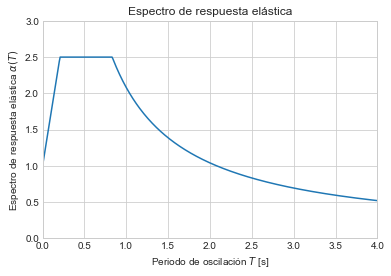

In [9]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = T
y = alfa_T
xlim=[0, max(T)]
ylim=[0, 3]
xlabel = 'Periodo de oscilación $T$ [s]'
ylabel = 'Espectro de respuesta elástica $\\alpha(T)$'
title = 'Espectro de respuesta elástica'
ax.plot(x, y)
ax.set(xlim=xlim, ylim=ylim, xlabel=xlabel, ylabel=ylabel, title=title)
plt.savefig('grafica_espectro.png')

## Versión

In [10]:
%load_ext version_information
%version_information matplotlib, numpy

Software versions
Python 3.7.6 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.12.0
OS Windows 10 10.0.18362 SP0
matplotlib 3.1.3
numpy 1.18.1
Mon Jun 08 12:07:56 2020 Hora de verano romance